## Smitesh Patil 22223696

In [1]:
# Package imports
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
%matplotlib inline

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))


class LogisticRegression:
    def __init__(self, max_iter, alpha, threshold):
        self.max_iter = max_iter
        self.alpha = alpha
        self.threshold = threshold
        self.weight = None
        self.bias = None
        self.error = []
    
        
    def fit(self, X, y):
        self.error = []
        self.weight = np.random.rand(np.shape(X)[1])
        self.bias = np.random.rand(1)
        for _ in range(self.max_iter):
            
            pred = sigmoid(np.dot(X, self.weight) + self.bias)
            dw = (1/np.shape(X)[0])*np.dot(X.T, (pred-y))
            db = (1/np.shape(X)[0])*np.sum(pred-y)
            
            error = 1/len(X)*np.sum((pred - y)**2)
            
            self.weight -= self.alpha*dw
            self.bias -= self.alpha*db
            
            self.error.append(error)
        
        
    def predict_prob(self, X):
        pred = sigmoid(np.dot(X, self.weight) + self.bias)
        return pred
    
    def predict(self, X):
        pred = sigmoid(np.dot(X, self.weight) + self.bias)
        roundoff = lambda x: [1 if ele < self.threshold else 0 for ele in x] 
        pred = roundoff(pred)
        return pred

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))


class LogisticRegressionSGD:
    def __init__(self, epoch, alpha, threshold):
        self.epoch = epoch
        self.alpha = alpha
        self.threshold = threshold
        self.weight = None
        self.bias = None
        self.error = []
        
    def fit(self, X, y):
        self.error = []
        self.weight = np.random.rand(np.shape(X)[1])
        self.bias = np.random.rand(1)
        for _ in range(self.epoch):
            error = 0
            pred = sigmoid(np.dot(X, self.weight) + self.bias)
            for x, y_pred, y_act in zip(X, pred, y):
                error += (y_pred - y_act)**2
                dw = np.dot(x.T, (y_pred-y_act))
                db = y_pred - y_act
                self.weight -= self.alpha*dw
                self.bias -= self.alpha*db     
            self.error.append(1/len(X)*error)
            
    def predict_prob(self, X):
        pred = sigmoid(np.dot(X, self.weight) + self.bias)
        return pred
    
    def predict(self, X):
        pred = sigmoid(np.dot(X, self.weight) + self.bias)
        roundoff = lambda x: [1 if ele >= self.threshold else 0 for ele in x] 
        pred = roundoff(pred)
        return pred

# Part 2

In [4]:
def evaluate(labels, predictions):
    
  assert len(labels) == len(predictions)

  score = 0.0
  
  true_positive = 0
  true_negative = 0
  false_positive = 0
  false_negative = 0

  #populating variables
  for label, prediction in zip(labels, predictions):
        if label == 1 and prediction == 1:
            true_positive += 1
        elif label == 0 and prediction == 0:
            true_negative += 1
        elif label == 0 and prediction == 1:
            false_positive += 1
        else:
            false_negative += 1
  #calculating precision, recall, f1score and accuracy for two classes
  accuracy_score = (true_positive + true_negative) / (true_positive + true_negative + false_positive  + false_negative)
  f1_score = true_positive/(true_positive + 0.5*(false_positive + false_negative))

  score = """ True Positive: %s \t False Positive: %s \n False Negative: %s \t True Negative: %s 
  \n\n Accurarcy: %s
  \n F1 Score : %s"""% (true_positive, false_negative, false_positive, true_negative, accuracy_score, f1_score)
    
  return print(score)


In [5]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

#function outputs 5 models trained using crossvalidation
def crossvalidation(X_train, Y_train, model, splits):
    cv = KFold(n_splits=splits)
    accuracy_scores = []
    for train, test in cv.split(X_train):
        roundoff = lambda x: [0 if ele <= model.threshold else 1 for ele in x] 
        x_train = X_train[train]
        y_train = Y_train[train]
        x_val = X_train[test]
        y_val = Y_train[test]

        model.fit(x_train, y_train)
        y_pred = roundoff(model.predict(x_val))
        accuracy_scores.append(accuracy_score(y_pred, y_val))    
    return accuracy_scores

# Linearly non-separable data

In [6]:
# Use pandas to read the CSV file as a dataframe
df = pd.read_csv("moons500.csv")

# The y values are those labelled 'Class': extract their values
y = df['Class'].values

# The x values are all other columns
del df['Class']   # drop the 'Class' column from the dataframe
X = df.values     # convert the remaining columns to a numpy array


In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Some examples of working with the data, to look at rows/columns
print ("len(X):", len(X))            # outer array: one per sample
print ("len(X[0]):", len(X[0]))      # each inner array is the attributes of one sample
print ("len(X[:,0]):", len(X[:,0]))  # select column 0 from array

# np.shape returns all dimensions of the array
(nsamples, nattribs) = np.shape(X)
print ("X: nsamples =", nsamples, ", nattribs =", nattribs)

# Now example the y vector (1D array)
print ("len(y)", len(y))
print ("np.shape(y):", np.shape(y))

# You can transpose the y data using 'reshape'
yt = np.reshape(y, (len(y),1))  
print ("np.shape(yt):", np.shape(yt))
(nsamples, nattribs) = np.shape(yt)
print ("y transpose: nsamples =", nsamples, ", nattribs =", nattribs)

len(X): 500
len(X[0]): 2
len(X[:,0]): 500
X: nsamples = 500 , nattribs = 2
len(y) 500
np.shape(y): (500,)
np.shape(yt): (500, 1)
y transpose: nsamples = 500 , nattribs = 1


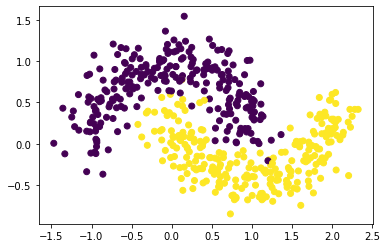

In [9]:
# plot X[0] vs X[1] and colour points according to the class, y
plt.scatter(X[:,0], X[:,1], c=y)  

In [10]:
lr = LogisticRegressionSGD(6, 0.1, 0.5)

In [11]:
crossvalidation(x_train, y_train, lr, 5)

[0.8571428571428571,
 0.7,
 0.9285714285714286,
 0.8857142857142857,
 0.8285714285714286]

In [12]:
lr.fit(x_train, y_train)

pred = lr.predict(x_test)

In [13]:
evaluate(y_test, pred)

 True Positive: 65 	 False Positive: 15 
 False Negative: 6 	 True Negative: 64 
  

 Accurarcy: 0.86
  
 F1 Score : 0.8609271523178808


In [14]:
pred = lr.predict_prob(x_test)

tpr_lr_nsd, fpr_lr_nsd, _ = roc_curve(y_test, pred)
auc_lr_nsd = roc_auc_score(y_test, pred)

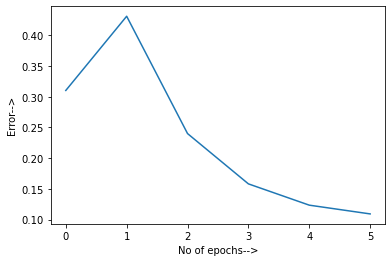

In [15]:
plt.plot(list(range(0, len(lr.error))), lr.error)
plt.xlabel("No of epochs-->")
plt.ylabel("Error-->")
plt.show()

# Linearly seperable dataset

In [16]:
# Use pandas to read the CSV file as a dataframe
df = pd.read_csv("blobs400.csv")

# The y values are those labelled 'Class': extract their values
y = df['Class'].values

# The x values are all other columns
del df['Class']   # drop the 'Class' column from the dataframe
X = df.values     # convert the remaining columns to a numpy array

In [17]:
# Some examples of working with the data, to look at rows/columns
print ("len(X):", len(X))            # outer array: one per sample
print ("len(X[0]):", len(X[0]))      # each inner array is the attributes of one sample
print ("len(X[:,0]):", len(X[:,0]))  # select column 0 from array

# np.shape returns all dimensions of the array
(nsamples, nattribs) = np.shape(X)
print ("X: nsamples =", nsamples, ", nattribs =", nattribs)

# Now example the y vector (1D array)
print ("len(y)", len(y))
print ("np.shape(y):", np.shape(y))

# You can transpose the y data using 'reshape'
yt = np.reshape(y, (len(y),1))  
print ("np.shape(yt):", np.shape(yt))
(nsamples, nattribs) = np.shape(yt)
print ("y transpose: nsamples =", nsamples, ", nattribs =", nattribs)

len(X): 400
len(X[0]): 3
len(X[:,0]): 400
X: nsamples = 400 , nattribs = 3
len(y) 400
np.shape(y): (400,)
np.shape(yt): (400, 1)
y transpose: nsamples = 400 , nattribs = 1


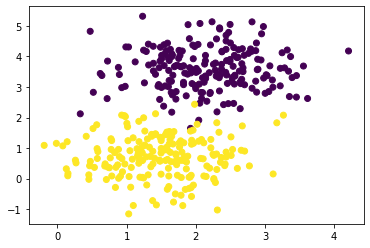

In [18]:
# plot X[0] vs X[1] and colour points according to the class, y
plt.scatter(X[:,0], X[:,1], c=y)  

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [20]:
lr = LogisticRegressionSGD(25, 0.1, 0.6)

In [21]:
crossvalidation(x_train, y_train, lr, 5)

[0.9705882352941176,
 0.9264705882352942,
 1.0,
 0.9705882352941176,
 0.9852941176470589]

In [22]:
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [23]:
evaluate(y_test, pred)

 True Positive: 23 	 False Positive: 2 
 False Negative: 0 	 True Negative: 35 
  

 Accurarcy: 0.9666666666666667
  
 F1 Score : 0.9583333333333334


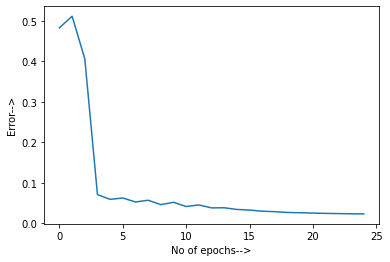

In [24]:
plt.plot(list(range(0, len(lr.error))), lr.error)
plt.xlabel("No of epochs-->")
plt.ylabel("Error-->")
plt.show()

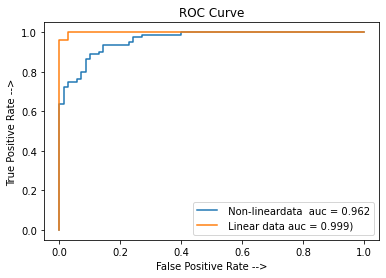

In [25]:
pred = lr.predict_prob(x_test)
tpr_lr_sd, fpr_lr_sd, _ = roc_curve(y_test, pred)
auc_lr_sd = roc_auc_score(y_test, pred)

plt.plot(tpr_lr_nsd, fpr_lr_nsd, linestyle='-', label=' Non-lineardata  auc = %0.3f' % auc_lr_nsd)
plt.plot(tpr_lr_sd, fpr_lr_sd, linestyle='-', label=' Linear data auc = %0.3f)' % auc_lr_sd)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
    
plt.legend()
plt.title("ROC Curve")
plt.savefig("Roc curve")
plt.show()

# Shallow Neural Network

In [26]:
class shallowNeuralNet:
    def __init__(self, epochs, learning_rate, hidden_nodes):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.weights = [None, None]
        self.bias = [None, None]
        self.hidden_nodes = hidden_nodes
        self.error_list = []
        
    def sigmoid(self, val):
        return 1/(1 + np.exp(-val))
    
    def sigmoid_derivative(self, val):
        return sigmoid(val) * (1 - sigmoid(val))
    
    def fit(self, X_full, Y_full):
        self.weights[0] = np.random.randn(self.hidden_nodes, X_full.shape[0]) * 0.01
        self.bias[0] = np.zeros((self.hidden_nodes, 1))
        self.weights[1] = np.random.randn(Y_full.shape[0], self.hidden_nodes) * 0.01
        self.bias[1] = np.zeros((Y_full.shape[0], 1))
        self.error_list = []
        for i in range(0, self.epochs):
            error = 0
            for X, Y in zip(X_full.T, Y_full.T):
                X = X.reshape(1, X.shape[0])
                Y = Y.reshape(1, Y.shape[0])
                
                self.Z1 = np.dot(self.weights[0], X.T) + self.bias[0]
                self.A1 = sigmoid(self.Z1)
                self.Z2 = np.dot(self.weights[1], self.A1) + self.bias[1]
                self.A2 = sigmoid(self.Z2)
                
                error += (np.squeeze(self.A2) - np.squeeze(Y))**2
                
                dZ2 = self.A2 - Y
                dW2 = np.dot(dZ2, self.A1.T)
                dB2 = np.sum(dZ2, axis = 1, keepdims= True)
                dZ1 = np.multiply(np.dot(self.weights[1].T, dZ2),self.sigmoid_derivative(self.A1))
                dW1 = np.dot(dZ1, X)
                dB1 = np.sum(dZ1, axis = 1, keepdims= True)

                self.weights[0] -= self.learning_rate * dW1
                self.bias[0] -= self.learning_rate * dB1
                self.weights[1] -= self.learning_rate * dW2
                self.bias[1] -= self.learning_rate * dB2
            self.error_list.append(error)
            
    def predict_prob(self, pred):
        layer1 = np.dot(self.weights[0], pred) + self.bias[0]
        activation1 = sigmoid(layer1)
        layer2 = np.dot(self.weights[1], activation1) + self.bias[1]
        activation2 = sigmoid(layer2)
        
        return activation2
    
    def predict(self, pred):
        layer1 = np.dot(self.weights[0], pred) + self.bias[0]
        activation1 = sigmoid(layer1)
        layer2 = np.dot(self.weights[1], activation1) + self.bias[1]
        activation2 = sigmoid(layer2)
        
        return np.round(activation2)

# Linearly Non Separable Data

In [117]:
df = pd.read_csv("moons500.csv")
y = df['Class'].values

del df['Class'] 
X = df.values

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train = X_train.T
y_train = y_train.reshape(1, y_train.shape[0])
X_test = X_test.T
y_test = y_test.reshape(1, y_test.shape[0])

In [98]:
snn = shallowNeuralNet(1000, 0.001, 10)

In [45]:
snn.fit(X_train, y_train)

In [30]:
evaluate(snn.predict(X_test)[0], y_test[0])

 True Positive: 33 	 False Positive: 4 
 False Negative: 6 	 True Negative: 32 
  

 Accurarcy: 0.8666666666666667
  
 F1 Score : 0.868421052631579


In [31]:
pred = snn.predict_prob(X_test)

tpr_lr_nsd, fpr_lr_nsd, _ = roc_curve(y_test[0], pred[0])
auc_lr_nsd = roc_auc_score(y_test[0], pred[0])

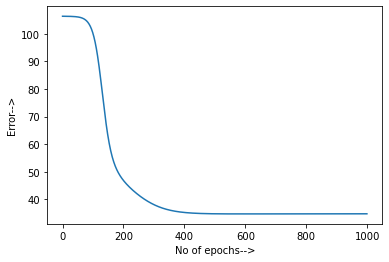

In [32]:
plt.plot(list(range(0, len(snn.error_list))), snn.error_list)
plt.xlabel("No of epochs-->")
plt.ylabel("Error-->")
plt.show()

# Linearly Separable Data

In [33]:
df = pd.read_csv("blobs400.csv")

y = df['Class'].values

del df['Class'] 
X = df.values   

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train = X_train.T
y_train = y_train.reshape(1, y_train.shape[0])
X_test = X_test.T
y_test = y_test.reshape(1, y_test.shape[0])

In [35]:
snn = shallowNeuralNet(25, 0.01, 100)

snn.fit(X_train, y_train)

In [36]:
evaluate(snn.predict(X_test)[0], y_test[0])

 True Positive: 24 	 False Positive: 0 
 False Negative: 1 	 True Negative: 35 
  

 Accurarcy: 0.9833333333333333
  
 F1 Score : 0.9795918367346939


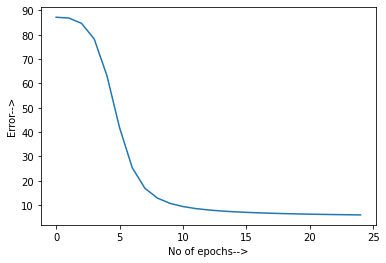

In [37]:
plt.plot(list(range(0, len(snn.error_list))), snn.error_list)
plt.xlabel("No of epochs-->")
plt.ylabel("Error-->")
plt.show()

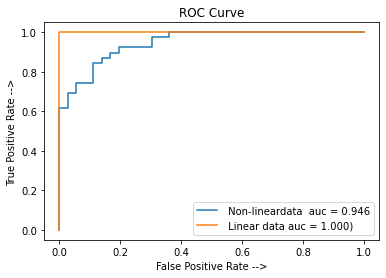

In [38]:
pred = snn.predict_prob(X_test)
tpr_lr_sd, fpr_lr_sd, _ = roc_curve(y_test[0], pred[0])
auc_lr_sd = roc_auc_score(y_test[0], pred[0])

plt.plot(tpr_lr_nsd, fpr_lr_nsd, linestyle='-', label=' Non-lineardata  auc = %0.3f' % auc_lr_nsd)
plt.plot(tpr_lr_sd, fpr_lr_sd, linestyle='-', label=' Linear data auc = %0.3f)' % auc_lr_sd)


plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
    
plt.legend()
plt.title("ROC Curve")
plt.savefig("Roc curve")
plt.show()

# MNIST DATA